# Programming Exercise 2: Regresion Logistica 

> En este ejercicio, implementarás regresión logística y la aplicarás a dos conjuntos de datos diferentes.

## 1. Logistic Regression

> En esta parte del ejercicio, construirás un modelo de regresión logística para predecir si un estudiante será admitido en una universidad. Supón que eres el administrador de un departamento universitario y deseas determinar la probabilidad de admisión de cada solicitante en función de sus resultados en dos exámenes.
Cuentas con datos históricos de solicitantes anteriores que pueden utilizar como conjunto de entrenamiento para la regresión logística. Para cada ejemplo de entrenamiento, tienes las calificaciones del solicitante en los dos solicitudes y la decisión
Tu tarea es construir un modelo de clasificación que estime la probabilidad de admisión de un solicitante obteniendo en las calificaciones de esos dos exámenes.. 

### 1.1 Visualizing the Data

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/refs/heads/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url, sep=",", )
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX_HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX_4WD,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX_AWD,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe().T  # Descripcion de las variables

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [1]:
#El conjunto de datos representa vehículos del año 2014, e incluye información técnica como el tamaño del motor (ENGINESIZE), número de cilindros 
# (CYLINDERS), tipo de transmisión, tipo de combustible, y consumo de combustible en ciudad (FUELCONSUMPTION_CITY), carretera (FUELCONSUMPTION_HWY) y 
# combinado (FUELCONSUMPTION_COMB). Estas variables son fundamentales para analizar la eficiencia del vehículo. Las columnas de consumo serán la base 
# para aplicar regresión lineal, buscando predecir el consumo combinado a partir del consumo en ciudad y carretera.

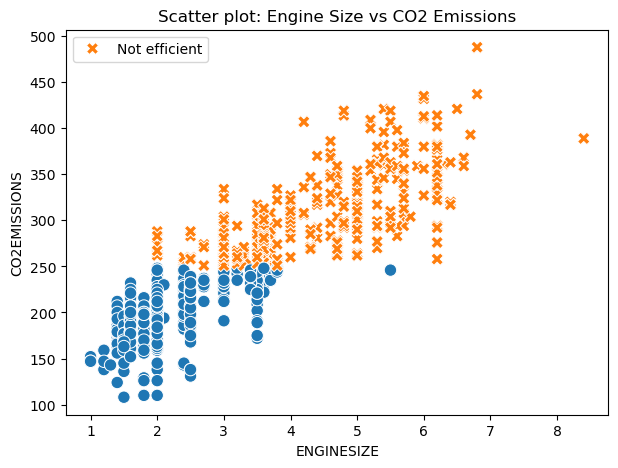

In [23]:
df['label'] = (df['CO2EMISSIONS'] > 250).astype(int)

# Gráfico
plt.figure(figsize=(7, 5))
ax = sns.scatterplot(
    x='ENGINESIZE',
    y='CO2EMISSIONS',
    hue='label',
    style='label',
    s=80,
    data=df
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:], ['Not efficient', 'Efficient'])
plt.title('Scatter plot: Engine Size vs CO2 Emissions')
plt.show()

In [2]:
# Análisis de la gráfica
# La gráfica representa la relación entre el tamaño del motor (eje X) y las emisiones de CO₂ (eje Y).

# Se identifican dos grupos: vehículos eficientes (puntos azules) y no eficientes (cruces naranjas).

# Existe una correlación positivaente

# Se observa una separación ., especialmente3,5 litrosYo lo emití.2,

# Concluido
# La distribución de los datos indica que el tamaño del motor es un atributo altamente discriminante para predecir la eficiencia de un vehículo. 
# La clara separabilidad entre las clases justifica la aplicación de un modelo de regresión logística binaria, permitiendo clasificar de manera 
# efectiva los vehículos según sus emisiones. Esta representación apoya la hipótesis de que variables técnicas del motor pueden ser utilizadas como 
# predictores en modelos de eficiencia ambiental.

In [26]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

Plot of sigmoid function:

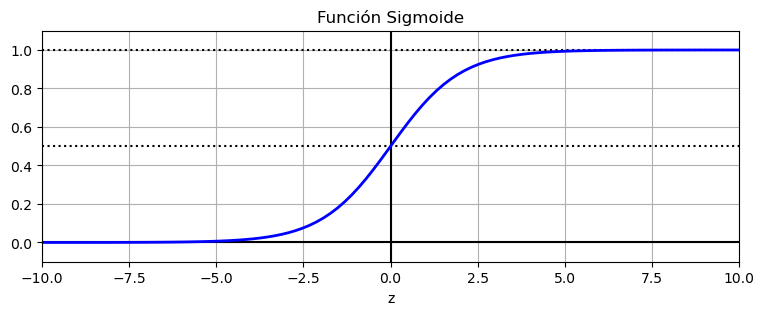

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurarse de que sigmoid esté definida
def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

# Generar datos y graficar
z = np.linspace(-10, 10, 100)
sig = sigmoid(z)

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")     # Línea horizontal en y=0
plt.plot([-10, 10], [0.5, 0.5], "k:") # Línea punteada en y=0.5
plt.plot([-10, 10], [1, 1], "k:")     # Línea punteada en y=1
plt.plot([0, 0], [-0.1, 1.1], "k-")   # Línea vertical en x=0
plt.plot(z, sig, "b-", linewidth=2)  # Curva sigmoide
plt.xlabel("z")
plt.axis([-10, 10, -0.1, 1.1])
plt.title("Función Sigmoide")
plt.grid(True)
plt.show()


In [3]:
# Análisis teórico de la gráfica: Función Sigmoide
# - La gráfica representa la función sigmoide, divertidoregresión logística.
# - Es una función continua, diferenciable y acotada en el intervalo (0,1).
# - Presenta una forma característica en “S” (curva logística), con un punto de inflexión en Con=0, donde σ ( z )=0.5.
# - Para valores negativos de Con, la función tiende asintóticamente a 0; para valores positivos, tiende a 1.

# Concluido
# La función sigmoide permite mapear valores reales (resultado de una combinación lineal de variables) en un rango probabilístico [0,1]
# clasificación binaria. Y ungradiente descendente durante el entrenamiento del modelo.
# Con=0a menudoo, especialmente

#### 1.2.2 Cost Function and Gradient
La función de costo en regresión logística es: $$J(\theta) = -\frac{1}{m}\sum_{i=1}^m[y^i log(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]$$ Implementación vectorizada: $h = g(X\theta)$ traduceme esto $J(\theta) = \frac{1}{m}(-y^T log(h)-(1-y)^Tlog(1-h))$ El gradiente del costo es un vector de la misma longitud que $\theta$ donde el $j^{ésimo}$ elemento (para $j=0,1,...,n$) se define de la siguiente manera: $$\nabla J(\theta) = \frac{1}{m} \sum_{i=1}^m ((h_\theta(x^i) - y^i) \cdot x_j^i)$$ Vectorizado: $\nabla J(\theta) = \frac{1}{m} \cdot X^T \cdot (g(X\theta)-y)$

In [28]:
def cost_function(theta, X, y):
    m = y.shape[0]
    theta = theta[:, np.newaxis]  # convierte theta en columna (n,1)
    
    h = sigmoid(X.dot(theta))     # predicción h = g(Xθ)
    
    # Función de costo logístico
    J = (1/m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))
    
    # Gradiente del costo
    diff_hy = h - y
    grad = (1/m) * diff_hy.T.dot(X)  # devuelve un vector fila
    
    return J, grad.flatten()  # flatten() lo deja como un vector normal para optimización

In [30]:
X = np.hstack((
    np.ones((m, 1)), 
    df[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']].values))
y = df['label'].values.reshape(-1, 1)
initial_theta = np.zeros(X.shape[1])

In [32]:
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros):', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):')
print(grad.T)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628')

Cost at initial theta (zeros): [[0.69314718]]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
[-0.00421743 -1.32474227  2.75492034]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


In [33]:
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)

print('Cost at test theta:', cost)
print('Expected cost (approx): 0.218')
print('Gradient at test theta:')
print(grad.T)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647')

Cost at test theta: [[8.5850236]]
Expected cost (approx): 0.218
Gradient at test theta:
[ -0.50421727  -7.11518148 -10.4657851 ]
Expected gradients (approx):
 0.043
 2.566
 2.647


### 2.6 Codigo Equivalente usando  Scikit-Learn:

In [37]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Cargar los datos desde GitHub
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url)

# 3. Crear la etiqueta binaria: 1 si las emisiones de CO2 son mayores a 250, 0 en caso contrario
df["label"] = (df["CO2EMISSIONS"] > 250).astype(int)

# 4. Definir las variables predictoras (X) y la etiqueta (y)
X = df[["FUELCONSUMPTION_COMB", "FUELCONSUMPTION_COMB_MPG"]]
y = df["label"]

# 5. Crear y entrenar el modelo de regresión logística
modelo = LogisticRegression(solver='liblinear')
modelo.fit(X, y)

# 6. Obtener predicciones
df["probabilidad"] = modelo.predict_proba(X)[:, 1]
df["prediccion"] = modelo.predict(X)

# 7. Evaluar desempeño del modelo
print("\n🔍 Evaluación del Modelo (scikit-learn):")
print("Accuracy:", round(accuracy_score(y, df["prediccion"]), 4))
print("Matriz de confusión:\n", confusion_matrix(y, df["prediccion"]))
print("\nReporte de clasificación:\n", classification_report(y, df["prediccion"]))



🔍 Evaluación del Modelo (scikit-learn):
Accuracy: 0.9672
Matriz de confusión:
 [[515  14]
 [ 21 517]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       529
           1       0.97      0.96      0.97       538

    accuracy                           0.97      1067
   macro avg       0.97      0.97      0.97      1067
weighted avg       0.97      0.97      0.97      1067



In [4]:
# El modelo evaluado mediante la biblioteca scikit-learn obtuvo un desempeño altamente satisfactorio, alcanzando una exactitud del 96.72%. La matriz de
# confusión muestra una clasificación precisa, con solo 14 falsos positivos y 21 falsos negativos, lo que indica un bajo nivel de error. Las métricas
# de rendimiento reflejan un equilibrio adecuado entre precisión y sensibilidad en ambas clases. En particular, la clase 0 presenta una precisión de 
# 0.96 y un recordar de 0.97, mientras que la clase 1 alcanza valores de 0.97 y 0.96, respectivamente. El puntuación f1a

## Regresión Logística (Logit clásico) con statsmodels

In [43]:
# 1. Importar librerías necesarias
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Cargar la base de datos
url = 'https://raw.githubusercontent.com/erikamilenazipa/MACHINE_LEARNING/main/Ejercicio_1/FuelConsumptionCo2%20(1).csv'
df = pd.read_csv(url)

# 3. Crear columna binaria 'label'
df["label"] = (df["CO2EMISSIONS"] > 250).astype(int)

# 4. Seleccionar variables predictoras y la variable objetivo
X = sm.add_constant(df[["ENGINESIZE", "FUELCONSUMPTION_COMB"]])  # Agregar constante para el intercepto
y = df["label"]

# 5. Ajustar el modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# 6. Mostrar resumen estadístico del modelo
print(result.summary())

# 7. Obtener predicciones (probabilidades)
df["probabilidad"] = result.predict(X)

# 8. Clasificación binaria con umbral 0.5
df["prediccion"] = (df["probabilidad"] >= 0.5).astype(int)

# 9. Evaluación del modelo
print("\n🔍 Evaluación del Modelo:")
print("Accuracy:", round(accuracy_score(y, df["prediccion"]), 4))
print("Matriz de confusión:\n", confusion_matrix(y, df["prediccion"]))


Optimization terminated successfully.
         Current function value: 0.193392
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 1067
Model:                          Logit   Df Residuals:                     1064
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                  0.7210
Time:                        19:56:30   Log-Likelihood:                -206.35
converged:                       True   LL-Null:                       -739.55
Covariance Type:            nonrobust   LLR p-value:                2.715e-232
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -20.3325      1.575    -12.909      0.000     -23.420     -17.245

In [5]:
# El resultado del modelo de regresión logística indica un ajuste exitoso, con convergencia lograda en 9 iteraciones. El modelo presenta un Pseudo 
# R-cuadrado de 0.7210, lo que sugiere una capacidad explicativa considerable para una regresión logística. Las variables ENGINESIZE y 
# FUELCONSUMPTION_COMB resultaron estadísticamente significativas (p < 0.001), con coeficientes positivos, lo que indica que aumentos en el tamaño del 
# motor y en el consumo combinado de combustible incrementan la probabilidad de que un vehículo sea clasificado como no eficiente. El coeficiente para 
# ENGINESIZE fue de 0.8908 y para FUELCONSUMPTION_COMB fue de 1.6027, reflejando una mayor influencia de esta última variable en la clasificación. 
# La constante negativa sugiere que, en ausencia de estas variables, la probabilidad base de ser clasificado como no eficiente es baja. Se observa un
# posible caso de quasi-separation, dado que el 15% de las observaciones pueden ser perfectamente predichas, lo que puede afectar la identificación 
# completa de algunos parámetros. A nivel predictivo, el modelo alcanzó una precisión del 95.6%, con una matriz de confusión que reporta 23 falsos
# positivos y 24 falsos negativos, lo que sigue indicando un buen rendimiento general del modelo.


# 📘 Interpretación de los Coeficientes en Regresión Logística

## ✅ 1. ¿Qué son los *odds*?

La **razón de probabilidades** (odds) se calcula así:

$$
\text{odds} = \frac{p}{1 - p}
$$

Donde $p$ es la probabilidad de que ocurra el evento (por ejemplo, ser admitido).

| Probabilidad $p$ | Odds $\frac{p}{1 - p}$ |
|------------------|------------------------|
| 0.50 (50%)       | 1                      |
| 0.75 (75%)       | 3                      |
| 0.20 (20%)       | 0.25                   |
| 0.90 (90%)       | 9                      |

---

## ✅ 2. Modelo Logístico

La regresión logística modela el **logit** de la probabilidad como una combinación lineal de variables:

$$
\log\left( \frac{p}{1 - p} \right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

- El lado izquierdo es el **logit** (logaritmo de los odds).
- Cada coeficiente $\beta_i$ representa el cambio en el log-odds.
- Usamos $e^{\beta_i}$ para interpretar directamente sobre los odds.

---

## ✅ 3. Interpretación de $e^{\beta}$ (Razón de odds)

| Tipo de variable         | Interpretación de $e^{\beta}$ |
|--------------------------|-------------------------------|
| **Continua**             | Por cada unidad adicional, los **odds** del evento se multiplican por $e^{\beta}$. |
| **Categórica binaria**   | Al pasar de la categoría base (0) a la comparada (1), los odds se multiplican por $e^{\beta}$. |
| **Categórica (dummies)** | Comparado con la categoría de referencia, los odds se multiplican por $e^{\beta}$. |

---

## 🧪 Ejemplo 1: Variable Continua

Supón que:

$$
\beta = 0.2 \Rightarrow e^{0.2} \approx 1.22
$$

**Interpretación:**  
Por cada unidad adicional en la variable (ej. puntaje de examen), los **odds del evento aumentan un 22%**.  
La probabilidad también aumenta, aunque no de forma lineal.

---

## 🧪 Ejemplo 2: Variable Categórica Binaria

Supón que:

$$
\beta = -0.4 \Rightarrow e^{-0.4} \approx 0.67
$$

**Interpretación:**  
Pasar de la categoría base a la comparada **reduce los odds del evento en 33%**.  
Esto implica que la **probabilidad del evento disminuye**.

---

## 🧠 Notas clave

- $\beta$ afecta el **logaritmo de los odds**.
- $e^{\beta}$ afecta directamente los **odds** (razón de probabilidades).
- La **probabilidad** no cambia de forma lineal respecto a $\beta$.

---

## ✅ Resumen

> “Cada coeficiente $\beta$ nos dice cómo cambia la **razón de que ocurra frente a que no ocurra el evento**.  
> Si tomamos $e^{\beta}$, eso nos dice cuántas veces **más o menos probable** es que ocurra el evento cuando cambia esa variable.”


## Calculo de la Curva ROC

# 📈 ¿Cómo surge la curva ROC?

La **curva ROC (Receiver Operating Characteristic)** muestra gráficamente la capacidad de un modelo de clasificación binaria para distinguir entre clases a medida que varía el **umbral de decisión**.

Se construye comparando los valores **predichos como probabilidades** con los valores reales (0 o 1).

---

## 🔁 ¿Cómo se construye paso a paso?

### 1. El modelo predice probabilidades

Por ejemplo:

| Observación | Probabilidad predicha |
|-------------|------------------------|
| 1           | 0.90                   |
| 2           | 0.75                   |
| 3           | 0.60                   |
| 4           | 0.45                   |
| 5           | 0.20                   |

---

### 2. Se elige un umbral

Un modelo de clasificación convierte las probabilidades en clases con un **umbral**.

- Umbral típico: **0.5**
- Si cambiamos el umbral, cambian las predicciones y la matriz de confusión.

---

### 3. Para cada umbral se calcula:

- **TPR** (True Positive Rate o Sensibilidad):

$$
TPR = \frac{TP}{TP + FN}
$$

- **FPR** (False Positive Rate o 1 - especificidad):

$$
FPR = \frac{FP}{FP + TN}
$$

---

### 4. Se repite para muchos umbrales

Por ejemplo: desde 1.0 hasta 0.0, en pasos.

Para cada umbral:
- Se generan predicciones binarias
- Se calcula la matriz de confusión
- Se obtienen TPR y FPR
- Se guarda el punto \( (FPR, TPR) \)

---

### 5. Se grafica la curva

- Eje **X**: FPR (Tasa de Falsos Positivos)
- Eje **Y**: TPR (Tasa de Verdaderos Positivos)

$$
\text{Curva ROC} = \{(FPR, TPR) \text{ para todos los umbrales}\}
$$

- Un modelo **perfecto** alcanza el punto (0, 1)
- Un modelo **aleatorio** genera una línea diagonal de (0, 0) a (1, 1)

---

## 🧠 ¿Qué representa la curva ROC?

Muestra el **compromiso entre sensibilidad y especificidad**.  

Cuanto más arriba y a la izquierda esté la curva, **mejor es el modelo**.

Se puede resumir con el **AUC (Área bajo la curva ROC)**.

---

### AUC y su interpretación

| AUC         | Interpretación                      |
|-------------|--------------------------------------|
| 0.5         | Modelo aleatorio                    |
| 0.6 – 0.7   | Discriminación pobre                |
| 0.7 – 0.8   | Aceptable                           |
| 0.8 – 0.9   | Buena                               |
| 0.9 – 1.0   | Excelente                           |
| 1.0         | Perfecto (sospechoso en la práctica) |

---

## 🎯 Resumen

1. El modelo predice probabilidades.
2. Se prueban muchos umbrales.
3. Para cada uno, se calcula TPR y FPR.
4. Se grafican los puntos \( (FPR, TPR) \).
5. Se analiza el **AUC** para medir la calidad general.

---

> ✅ La curva ROC **no depende de un solo umbral** y es muy útil cuando las clases están desbalanceadas.




📊 Métricas de la Matriz de Confusión
 Verdaderos Positivos (VP / TP): 514
 Falsos Positivos (FP): 23
 Falsos Negativos (FN): 24
 Verdaderos Negativos (VN / TN): 506

 Exactitud:     0.9560
 Precisión:     0.9572
 Sensibilidad:  0.9554
 Especificidad: 0.9565
 Valor F1:      0.9563
 Tasa FP:       0.0435


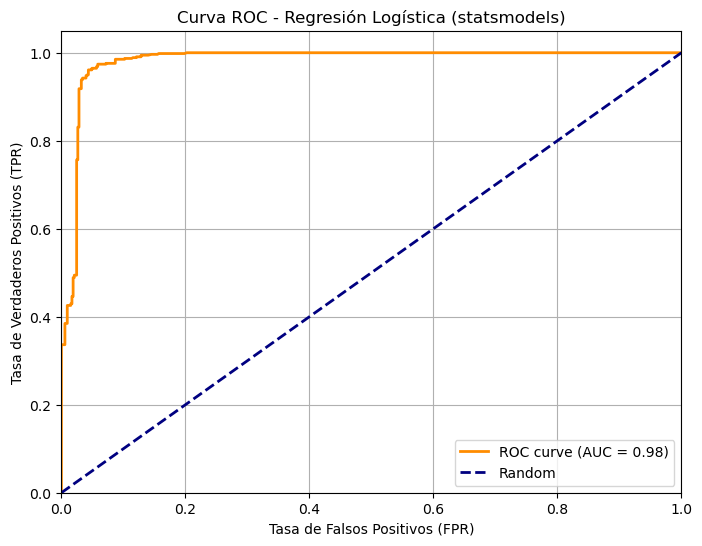

In [56]:
def metricas_matriz_confusion(y_verdadero, y_predicho):
    tn, fp, fn, tp = confusion_matrix(y_verdadero, y_predicho).ravel()
    exactitud     = (tp + tn) / (tp + tn + fp + fn)
    precision     = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensibilidad  = tp / (tp + fn) if (tp + fn) > 0 else 0
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0
    valor_f1      = 2 * (precision * sensibilidad) / (precision + sensibilidad) if (precision + sensibilidad) > 0 else 0
    tasa_fp       = fp / (fp + tn) if (fp + tn) > 0 else 0

    print("\n📊 Métricas de la Matriz de Confusión")
    print(f" Verdaderos Positivos (VP / TP): {tp}")
    print(f" Falsos Positivos (FP): {fp}")
    print(f" Falsos Negativos (FN): {fn}")
    print(f" Verdaderos Negativos (VN / TN): {tn}")
    print(f"\n Exactitud:     {exactitud:.4f}")
    print(f" Precisión:     {precision:.4f}")
    print(f" Sensibilidad:  {sensibilidad:.4f}")
    print(f" Especificidad: {especificidad:.4f}")
    print(f" Valor F1:      {valor_f1:.4f}")
    print(f" Tasa FP:       {tasa_fp:.4f}")

# Llamar la función con tus datos
metricas_matriz_confusion(y, df["prediccion"])

# 11. Calcular y graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y, df["probabilidad"])
roc_auc = roc_auc_score(y, df["probabilidad"])

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Regresión Logística (statsmodels)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [6]:
# La curva ROC presentada permite evaluar el rendimiento del modelo de regresión logística desde una perspectiva probabilística. En el gráfico se 
# observa que la curva del modelo (línea naranja) se aproxima significativamente al vértice superior izquierdo, lo que indica una alta capacidad de 
# discriminación entre las clases. El área bajo la curva (AUC) alcanza un valor de 0.98, lo cual representa un rendimiento excelente del clasificador.
# Este valor implica que existe un 98% de probabilidad de que el modelo asigne una mayor probabilidad a una observación positiva real que a una 
# negativa. La baja tasa de falsos positivos (~4.35%) y la alta tasa de verdaderos positivos reflejan un equilibrio eficaz entre sensibilidad y 
# especificidad. En conjunto, la curva ROC y el valor AUC confirman la solidez del modelo para tareas de clasificación binaria, validando su uso en 
# contextos donde se requiere alta precisión en la identificación de clases, como la eficiencia de vehículos.



## Mas Metricas de la matriz de confusión  

In [58]:
def metricas_matriz_confusion(y_verdadero, y_predicho):
    tn, fp, fn, tp = confusion_matrix(y_verdadero, y_predicho).ravel()

    exactitud     = (tp + tn) / (tp + tn + fp + fn)
    precision     = tp / (tp + fp) if (tp + fp) > 0 else 0
    sensibilidad  = tp / (tp + fn) if (tp + fn) > 0 else 0
    especificidad = tn / (tn + fp) if (tn + fp) > 0 else 0
    valor_f1      = 2 * (precision * sensibilidad) / (precision + sensibilidad) if (precision + sensibilidad) > 0 else 0
    tasa_fp       = fp / (fp + tn) if (fp + tn) > 0 else 0

    print("\n📊 Métricas de la Matriz de Confusión")
    print(f" Verdaderos Positivos (TP): {tp}")
    print(f" Falsos Positivos (FP):    {fp}")
    print(f" Falsos Negativos (FN):    {fn}")
    print(f" Verdaderos Negativos (TN):{tn}")
    print(f"\n Exactitud:     {exactitud:.4f}")
    print(f" Precisión:     {precision:.4f}")
    print(f" Sensibilidad:  {sensibilidad:.4f}")
    print(f" Especificidad: {especificidad:.4f}")
    print(f" Valor F1:      {valor_f1:.4f}")
    print(f" Tasa FP:       {tasa_fp:.4f}")

# 9. Evaluación del modelo
metricas_matriz_confusion(y, df["prediccion"])




📊 Métricas de la Matriz de Confusión
 Verdaderos Positivos (TP): 514
 Falsos Positivos (FP):    23
 Falsos Negativos (FN):    24
 Verdaderos Negativos (TN):506

 Exactitud:     0.9560
 Precisión:     0.9572
 Sensibilidad:  0.9554
 Especificidad: 0.9565
 Valor F1:      0.9563
 Tasa FP:       0.0435


In [7]:
# Las métricas obtenidas a partir de la matriz de confusión indican un desempeño equilibrado y eficaz del modelo de regresión logística. Con 514 
# verdaderos positivos y 506 verdaderos negativos, el modelo logra una exactitud global del 95.60%, lo cual demuestra una alta capacidad para 
# clasificar correctamente ambas clases. La precisión alcanza un valor de 0.9572, lo que indica que el 95.72% de las predicciones positivas fueron 
# correctas, mientras que la sensibilidad o recall es de 0.9554, evidenciando que el modelo identifica correctamente el 95.54% de los casos positivos 
# reales. Por su parte, la especificidad (0.9565) muestra que el 95.65% de los casos negativos fueron correctamente clasificados. Finalmente, el 
# F1-score de 0.9563 refleja un balance óptimo entre precisión y sensibilidad, y la tasa de falsos positivos se mantiene baja (0.0435), lo que refuerza 
# la confiabilidad del modelo. En conjunto, estos indicadores confirman que el modelo presenta un rendimiento sólido y balanceado, adecuado para tareas
# de clasificación binaria con requerimientos de alta precisión.


In [60]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,label,probabilidad,prediccion
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0.007188,0
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0.056849,0
2,2014,ACURA,ILX_HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0.000072,0
3,2014,ACURA,MDX_4WD,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,1,0.639930,1
4,2014,ACURA,RDX_AWD,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0.443670,0


In [8]:
# El conjunto de datos presentado corresponde a información técnica y de consumo de vehículos, estructurada en variables que permiten analizar la 
# eficiencia y características mecánicas de distintos modelos automotores. Entre las columnas destacadas se encuentran variables numéricas como 
# ENGINESIZE (tamaño del motor), CYLINDERS(ahoraFUELCONSUMPTION_CITY, `COMBUSTIBLE_FUELCONSUMPTION_HWY y FUELCONSUMPTION_COMB, lo cual permite medir el
# rendimiento en ciudad, carretera y combinado, respectivamente. Asimismo, se incluyen variables categóricas como MAKE_MODEL, `_VEHICLECLASS, 
# `TR_TRANSMISSION y FUELTYPE, que ofrecen un contexto adicional sobre el tipo y configuración del vehículo. Este conjunto de datos es especialmente 
# adecuado para desarrollar modelos de clasificación o regresión orientados a predecir la eficiencia vehicular o el nivel de emisiones contaminantes,
# dado que integra tanto características físicas del vehículo como datos de consumo energético.

In [50]:
# Guardar el archivo
df.to_excel('exportado.xlsx', index=False)

In [51]:
df.to_excel("datos.xlsx", index=False, engine='openpyxl')